In [1]:
import niio
import numpy as np
import pandas as pd

import fragmenter as frag

from statsmodels import multivariate
from statsmodels.multivariate import manova

In [188]:
surface_file = '/mnt/parcellator/parcellation/parcellearning/Data/Surfaces/285345.L.midthickness.32k_fs_LR.acpc.surf.gii'
[vertices, faces] = niio.loaded.loadSurf(surface_file)

label_file = '/mnt/parcellator/parcellation/parcellearning/Data/Labels/Desikan/285345.L.aparc.32k_fs_LR.label.gii'
R = frag.RegionExtractor.Extractor(label_file)
precentral_indices = R.indices(R.map_regions(), ['precentral'])
ipl_indices = R.indices(R.map_regions(), ['inferiorparietal'])

precentral_eigens_file = '/mnt/parcellator/parcellation/parcellearning/Data/Connectopy/Regional/285345/precentral/285345.L.precentral.2.brain.Evecs.func.gii'
precentral_eigens = niio.loaded.load(precentral_eigens_file)

ipl_eigens_file = '/mnt/parcellator/parcellation/parcellearning/Data/Connectopy/Regional/285345/inferiorparietal/285345.L.inferiorparietal.2.brain.Evecs.func.gii'
ipl_eigens_file = niio.loaded.load(ipl_eigens_file)

In [239]:
x = vertices[precentral_indices, 0]
y = vertices[precentral_indices, 1]
z = vertices[precentral_indices, 2]
e1 = precentral_eigens[precentral_indices, 0]
e2 = precentral_eigens[precentral_indices, 1]
e3 = precentral_eigens[precentral_indices, 2]
e4 = precentral_eigens[precentral_indices, 3]
intercept = np.ones(shape=(len(precentral_indices,)))

data = {'x': x, 'y': y, 'z': z, 
        'e1': e1, 'e2': e2, 'e3': e3, 'e4': e4, 
        'intercept': intercept}
precentral_df = pd.DataFrame(data)

In [240]:
precentral_df.to_csv('/mnt/home/keschenb/Desktop/PrecentralData.csv', header=True,index=False)
precentral_df.head()

M = manova.MANOVA(endog=precentral_df[['x','y','z']], exog=precentral_df[['intercept', 'e1', 'e2']])
T = M.mv_test(hypotheses=None)
T.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
------------------------------------------------------------------
           x0            Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0354 3.0000 1972.0000 17931.6993 0.0000
         Pillai's trace  0.9646 3.0000 1972.0000 17931.6993 0.0000
 Hotelling-Lawley trace 27.2795 3.0000 1972.0000 17931.6993 0.0000
    Roy's greatest root 27.2795 3.0000 1972.0000 17931.6993 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
            x1            Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda  0.0643 3.0000 1972.0000 9565.7519 0.0000
          Pillai's trace  0.9357 3.0000 1972.0000 9565.7519 0.0000
  Hotelling-Lawley trace 14.5524 3.0000 1972.0000 9565.7519 0.0000
     Roy's greatest root 14.5524 3.0000 1972.0000 9565.7519 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
              x2           Value  Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
             Wilks' lambda 0.6149 3.0000 1972.0000 411.7144 0.0000
            Pillai's trace 0.3851 3.0000 1972.0000 411.7144 0.0000
    Hotelling-Lawley trace 0.6263 3.0000 1972.0000 411.7144 0.0000
       Roy's greatest root 0.6263 3.0000 1972.0000 411.7144 0.0000
==================================================================

"""

In [198]:
x = vertices[ipl_indices, 0]
y = vertices[ipl_indices, 1]
z = vertices[ipl_indices, 2]
e1 = ipl_eigens_file[ipl_indices, 0]
e2 = ipl_eigens_file[ipl_indices, 1]
e3 = ipl_eigens_file[ipl_indices, 2]
e4 = ipl_eigens_file[ipl_indices, 3]
intercept = np.ones(shape=(len(ipl_indices,)))

data = {'x': x, 'y': y, 'z': z, 'e1': e1, 'e2': e2, 'e3': e3, 'e4': e4, 'e12': e1**2, 'intercept': intercept}
ipl_df = pd.DataFrame(data)

In [199]:
precentral_df.to_csv('/mnt/home/keschenb/Desktop/IPLData.csv', header=True,index=False)
precentral_df.head()

M = manova.MANOVA(endog=ipl_df[['x','y','z']], exog=ipl_df[['intercept', 'e1', 'e2']])
T = M.mv_test(hypotheses=None)
T.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
------------------------------------------------------------------
           x0            Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0263 3.0000 1812.0000 22319.4647 0.0000
         Pillai's trace  0.9737 3.0000 1812.0000 22319.4647 0.0000
 Hotelling-Lawley trace 36.9528 3.0000 1812.0000 22319.4647 0.0000
    Roy's greatest root 36.9528 3.0000 1812.0000 22319.4647 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
            x1            Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda  0.0853 3.0000 1812.0000 6476.8813 0.0000
          Pillai's trace  0.9147 3.0000 1812.0000 6476.8813 0.0000
  Hotelling-Lawley trace 10.7233 3.0000 1812.0000 6476.8813 0.0000
     Roy's greatest root 10.7233 3.0000 1812.0000 6476.8813 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             x2           Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.3313 3.0000 1812.0000 1218.8862 0.0000
           Pillai's trace 0.6687 3.0000 1812.0000 1218.8862 0.0000
   Hotelling-Lawley trace 2.0180 3.0000 1812.0000 1218.8862 0.0000
      Roy's greatest root 2.0180 3.0000 1812.0000 1218.8862 0.0000
==================================================================

"""

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt

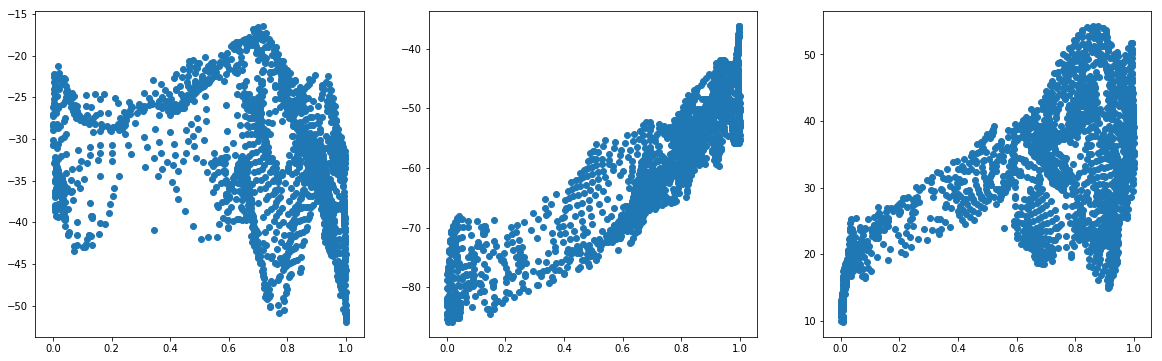

In [216]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
ax1.scatter(e1, x)
ax2.scatter(e1, y)
ax3.scatter(e1, z)

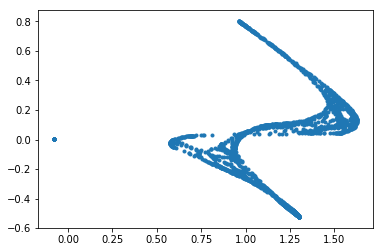

In [234]:
plt.scatter(trans[:,0], trans[:,1], marker='.')

In [219]:
np.corrcoef(np.row_stack([x,y,z]))

array([[ 1.        , -0.18565037,  0.27623569],
       [-0.18565037,  1.        ,  0.42778307],
       [ 0.27623569,  0.42778307,  1.        ]])

In [226]:
from sklearn.decomposition import PCA

In [228]:
P = PCA(n_components=precentral_eigens.shape[1])

In [229]:
P.fit(precentral_eigens)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [232]:
trans = P.transform(precentral_eigens)

In [233]:
trans.shape

(32492, 5)